In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from ast import literal_eval
import joblib
import sys
sys.path.append("../")

from cfmining.algorithms import MAPOFCEM
from cfmining.criteria import PercentileCalculator, PercentileCriterion, PercentileChangesCriterion, NonDomCriterion
from cfmining.predictors import GeneralClassifier_Shap
from cfmining.action_set import ActionSet
from cfmining.utils import get_data_model

import dice_ml


%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [97]:
X_train, Y_train, model, _, individuals = get_data_model("german")
outlier_detection = joblib.load("../models/german/IsolationForest_test.pkl")

In [98]:
action_set = ActionSet(X = X_train)
not_mutable_features = ['Age', 'OwnsHouse', 'isMale', 'JobClassIsSkilled', 'Single', 'ForeignWorker', 'RentsHouse']
mutable_features = [feat for feat in X_train.columns if feat not in not_mutable_features]
continuous_features = ['Age', 'LoanDuration', 'LoanAmount', 'LoanRateAsPercentOfIncome','YearsAtCurrentHome']
for feat in action_set:
    if feat.name in not_mutable_features:
        feat.mutable = False
    if not feat.name in not_mutable_features:
        feat.mutable = True

    #if feat.name == "LoanDuration":
    #    feat.step_size = 6
    #    feat.step_type = "absolute"
    feat.step_direction = 0
    feat.update_grid()
percCalc = PercentileCalculator(action_set = action_set)

In [96]:
def summarize_results(results, outlier_detection):
    results["individual"] = results["individual"].apply(literal_eval)
    results["solutions"] = results["solutions"].apply(literal_eval)
    costs = []
    n_changes = []
    outliers = []
    for i in range(len(results)):
        criteria = PercentileCriterion(individuals.iloc[i].values, percCalc)
        solutions = results["solutions"].iloc[i]
        costs_ = [criteria.f(s) for s in solutions][0]
        individual = results["individual"].iloc[i]
        if len(individual) == 1:
            individual = individual[0]
        sol0 = results["solutions"].iloc[i][0]
        n_changes_ = sum([1 for i in range(len(individual)) if individual[i] != sol0[i]])

        n_changes.append(n_changes_)
        costs.append(costs_)
        outliers_ = [outlier_detection.predict(np.array(s)[None, :]) == -1 for s in solutions][0][0]
        outliers.append(outliers_)
    results["costs"] = costs
    results["outlier"] = outliers
    results["n_changes"] = n_changes


    print(f"Time: {results['time'].mean():.3f} +- {results['time'].std():.3f}")
    print(f"Costs: {results['costs'].mean():.3f} +- {results['costs'].std():.3f}")
    print(f"Changes: {results['n_changes'].mean():.3f} +- {results['n_changes'].std():.3f}")
    print(f"Outliers: {results['outlier'].mean():.3f}")

    fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (6, 3))
    axs[0].scatter(
        results.sort_values("prob")["prob"],
        results.sort_values("prob")["time"],
    )
    axs[0].set_xlabel("Probability")
    axs[0].set_ylabel("Time (s)")

    axs[1].scatter(
        results.sort_values("prob")["prob"],
        results.sort_values("prob")["costs"],
    )
    axs[1].set_xlabel("Probability")
    axs[1].set_ylabel("Costs")

    plt.tight_layout()
    plt.show()

Time: 0.155 +- 0.015
Costs: 0.522 +- 0.257
Changes: 1.694 +- 0.465
Outliers: 0.032


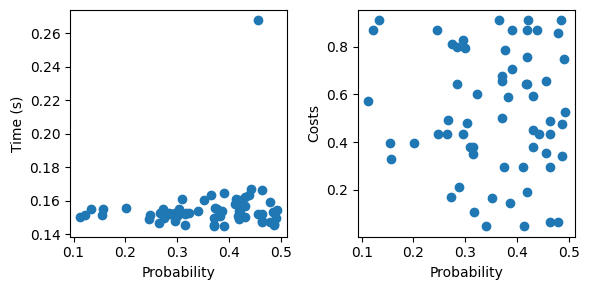

In [70]:
results = pd.read_csv("../results/german/dice_1sol.csv")
summarize_results(results, outlier_detection)

Time: 0.341 +- 0.456
Costs: 0.110 +- 0.078
Changes: 1.855 +- 0.903
Outliers: 0.000


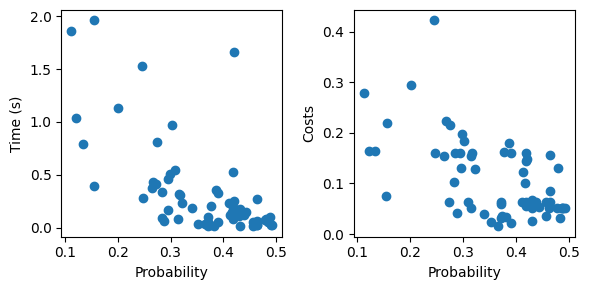

In [100]:
results = pd.read_csv("../results/german/mapofcem_percentile.csv")
summarize_results(results, outlier_detection)

Time: 0.344 +- 0.462
Costs: 0.110 +- 0.078
Changes: 1.855 +- 0.903
Outliers: 0.000


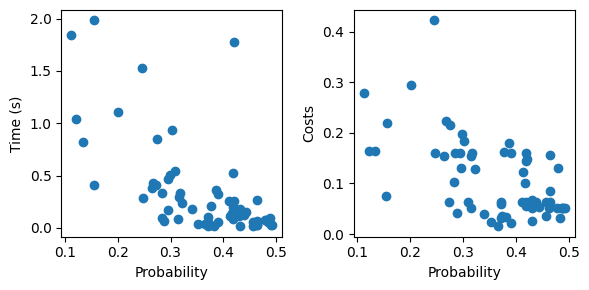

In [72]:
results = pd.read_csv("../results/german/mapofcem_v2_percentile.csv")
summarize_results(results, outlier_detection)

Time: 5.458 +- 10.691
Costs: 0.795 +- 0.126
Changes: 2.120 +- 0.918
Outliers: 0.020


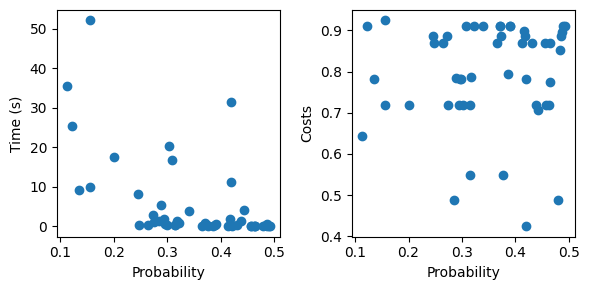

Time: 0.706 +- 1.172
Costs: 0.796 +- 0.125
Changes: 1.980 +- 0.869
Outliers: 0.020


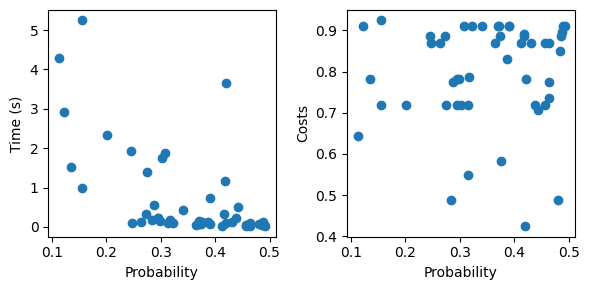

Time: 0.386 +- 0.488
Costs: 0.792 +- 0.135
Changes: 1.920 +- 0.944
Outliers: 0.000


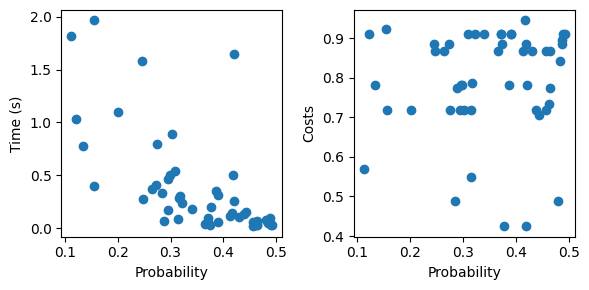

Time: 0.354 +- 0.354
Costs: 0.798 +- 0.126
Changes: 2.180 +- 0.896
Outliers: 0.020


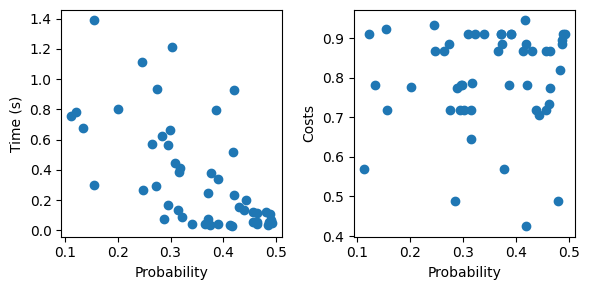

Time: 0.307 +- 0.343
Costs: 0.794 +- 0.129
Changes: 1.960 +- 0.856
Outliers: 0.020


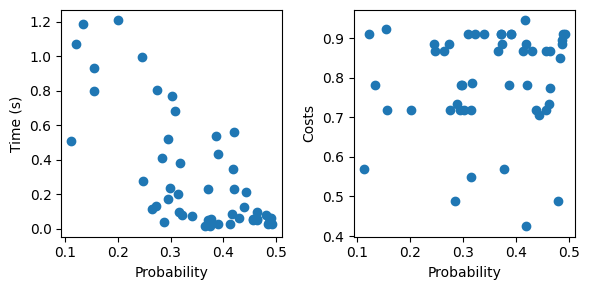

In [101]:
for s in [1, 5, 10, 20, 25]:
    results = pd.read_csv(f"../results/german_step_size/mapofcem_{s}.csv")
    summarize_results(results, outlier_detection)

## Taiwan

In [102]:
X_train, Y_train, model, _, individuals = get_data_model("taiwan")
X_train = X_train.astype(int)
individuals = individuals.astype(int)
outlier_detection = joblib.load("../models/taiwan/IsolationForest_test.pkl")

In [84]:
action_set = ActionSet(X = X_train)
not_mutable_features = ['Single', 'Age_in_25_to_40', 'Married', 'Age_lt_25', 'Age_in_40_to_59', 'Age_geq_60', 'EducationLevel']
mutable_features = [feat for feat in X_train.columns if feat not in not_mutable_features]
for feat in action_set:
    if feat.name in not_mutable_features:
        feat.mutable = False
    if feat.name in mutable_features:
        feat.mutable = True

    feat.step_direction = 0
    feat.update_grid()

Time: 0.240 +- 0.106
Costs: 0.941 +- 0.135
Changes: 1.750 +- 0.435
Outliers: 0.010


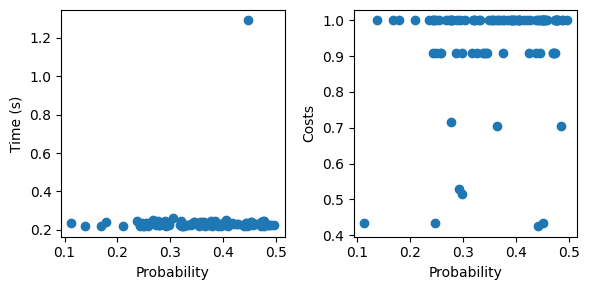

In [89]:
results = pd.read_csv("../results/taiwan/dice_1sol.csv")
summarize_results(results, outlier_detection)

Time: 2.821 +- 7.568
Costs: 0.943 +- 0.137
Changes: 2.231 +- 0.836
Outliers: 0.000


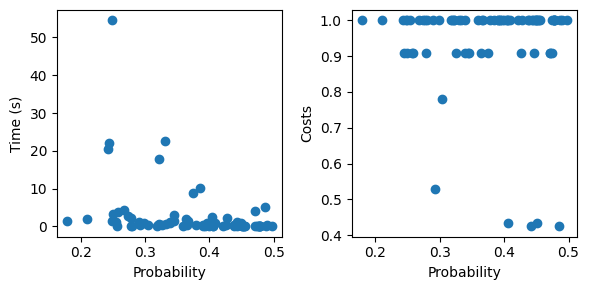

In [90]:
results = pd.read_csv("../results/taiwan/mapofcem_percentile.csv")
summarize_results(results, outlier_detection)

Time: 120.685 +- 502.878
Costs: 0.930 +- 0.157
Changes: 2.300 +- 0.835
Outliers: 0.000


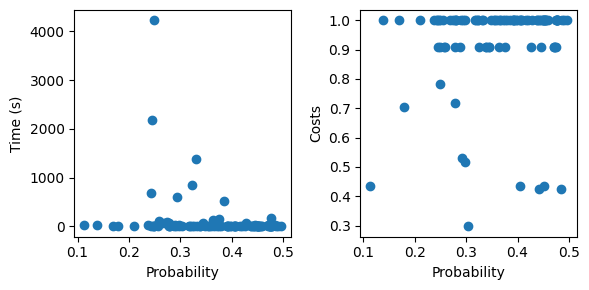

In [91]:
results = pd.read_csv("../results/taiwan/mapofcem_v2_percentile.csv")
summarize_results(results, outlier_detection)

Time: 8.697 +- 27.029
Costs: 0.908 +- 0.188
Changes: 2.160 +- 0.889
Outliers: 0.000


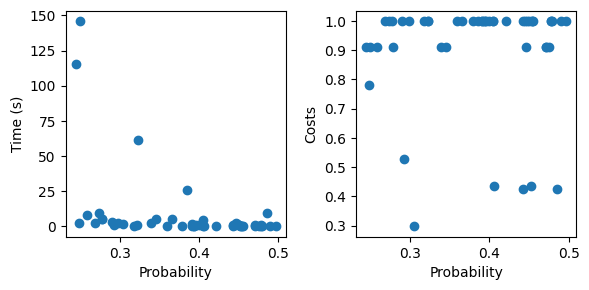

Time: 2.923 +- 8.508
Costs: 0.924 +- 0.167
Changes: 2.140 +- 0.857
Outliers: 0.000


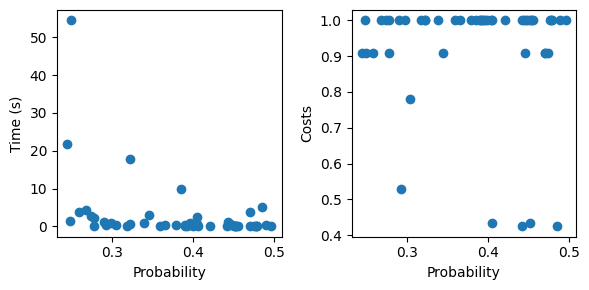

Time: 1.537 +- 4.758
Costs: 0.932 +- 0.163
Changes: 2.170 +- 0.816
Outliers: 0.000


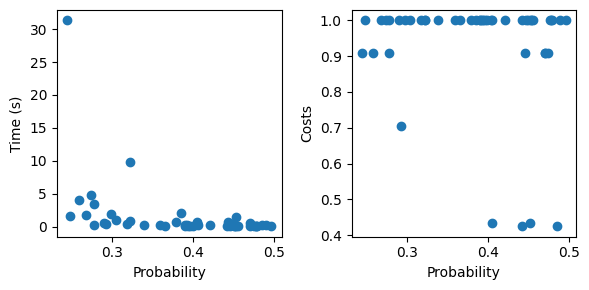

In [95]:
for s in [5, 10, 20]:
    results = pd.read_csv(f"../results/taiwan_step_size/mapofcem_{s}.csv")
    summarize_results(results, outlier_detection)

Time: 8.707 +- 27.010
Costs: 0.908 +- 0.188
Changes: 2.160 +- 0.889
Outliers: 0.000


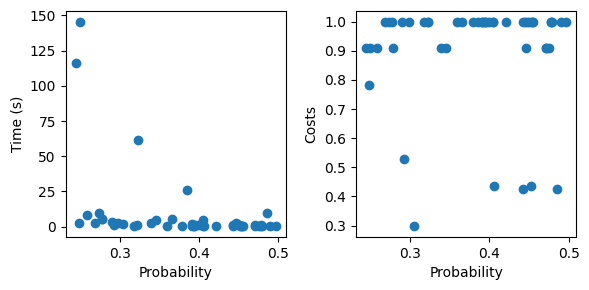

Time: 2.927 +- 8.503
Costs: 0.924 +- 0.167
Changes: 2.140 +- 0.857
Outliers: 0.000


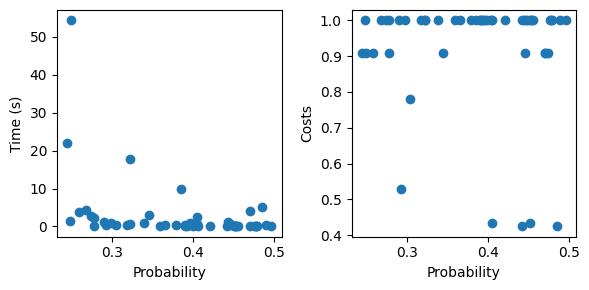

Time: 2.892 +- 10.960
Costs: 0.932 +- 0.159
Changes: 2.200 +- 0.808
Outliers: 0.000


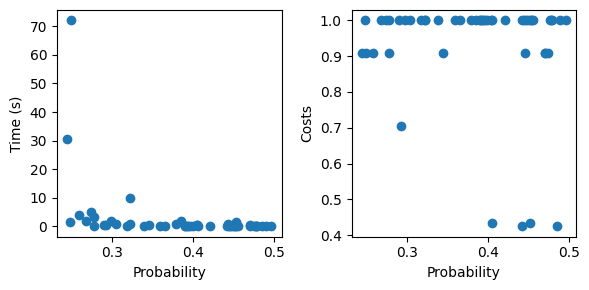

Time: 2.116 +- 6.179
Costs: 0.921 +- 0.174
Changes: 2.140 +- 0.857
Outliers: 0.000


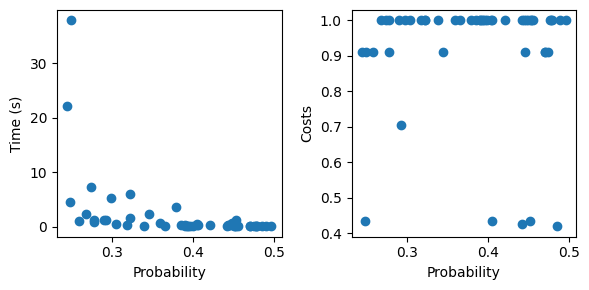

In [103]:
for s in [5, 10, 20, 25]:
    results = pd.read_csv(f"../results/taiwan_step_size/mapofcem_{s}.csv")
    summarize_results(results, outlier_detection)